In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict

## Impact matrices per model

In [121]:
model = 'babyberta'
def open_pkl_result(metric, layer):
    with open(f'results/{model}_{metric}_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [122]:
def visualize_impact_matrix(sentence, imatrix, layer):
    fig, ax = plt.subplots()
    im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
    ax.figure.colorbar(im, ax=ax)

        # We want to show all ticks...
    ax.set(xticks=np.arange(imatrix.shape[1]),
           yticks=np.arange(imatrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=sentence, yticklabels=sentence,
           title='Impact matrix of sentence at layer ' + str(layer))
    
    ax.set_ylabel('Prediction of ...')
    ax.set_xlabel('Influence of ... on the prediction')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.tight_layout()

In [123]:
metric = 'dist'
layer = 8
data = open_pkl_result(metric, layer)[0]
sentence, imatrix = data[1], data[2]

visualize_impact_matrix(sentence, imatrix, layer)

FileNotFoundError: [Errno 2] No such file or directory: 'results/gpt2_dist_8.pkl'

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_layer_matrices(sentence, matrices):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx]
        
        # Create heatmap
        im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
        
        # Set tick marks and labels
        ax.set(xticks=np.arange(imatrix.shape[1]),
               yticks=np.arange(imatrix.shape[0]),
               xticklabels=sentence, yticklabels=sentence)
        
        # Rotate the tick labels for better layout
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)

In [ ]:
metric = 'dist'
all_matrices = []
for i in range(1, 9):
    data = open_pkl_result(metric, i)[0]
    sentence, imatrix = data[1], data[2]
    all_matrices.append(imatrix)

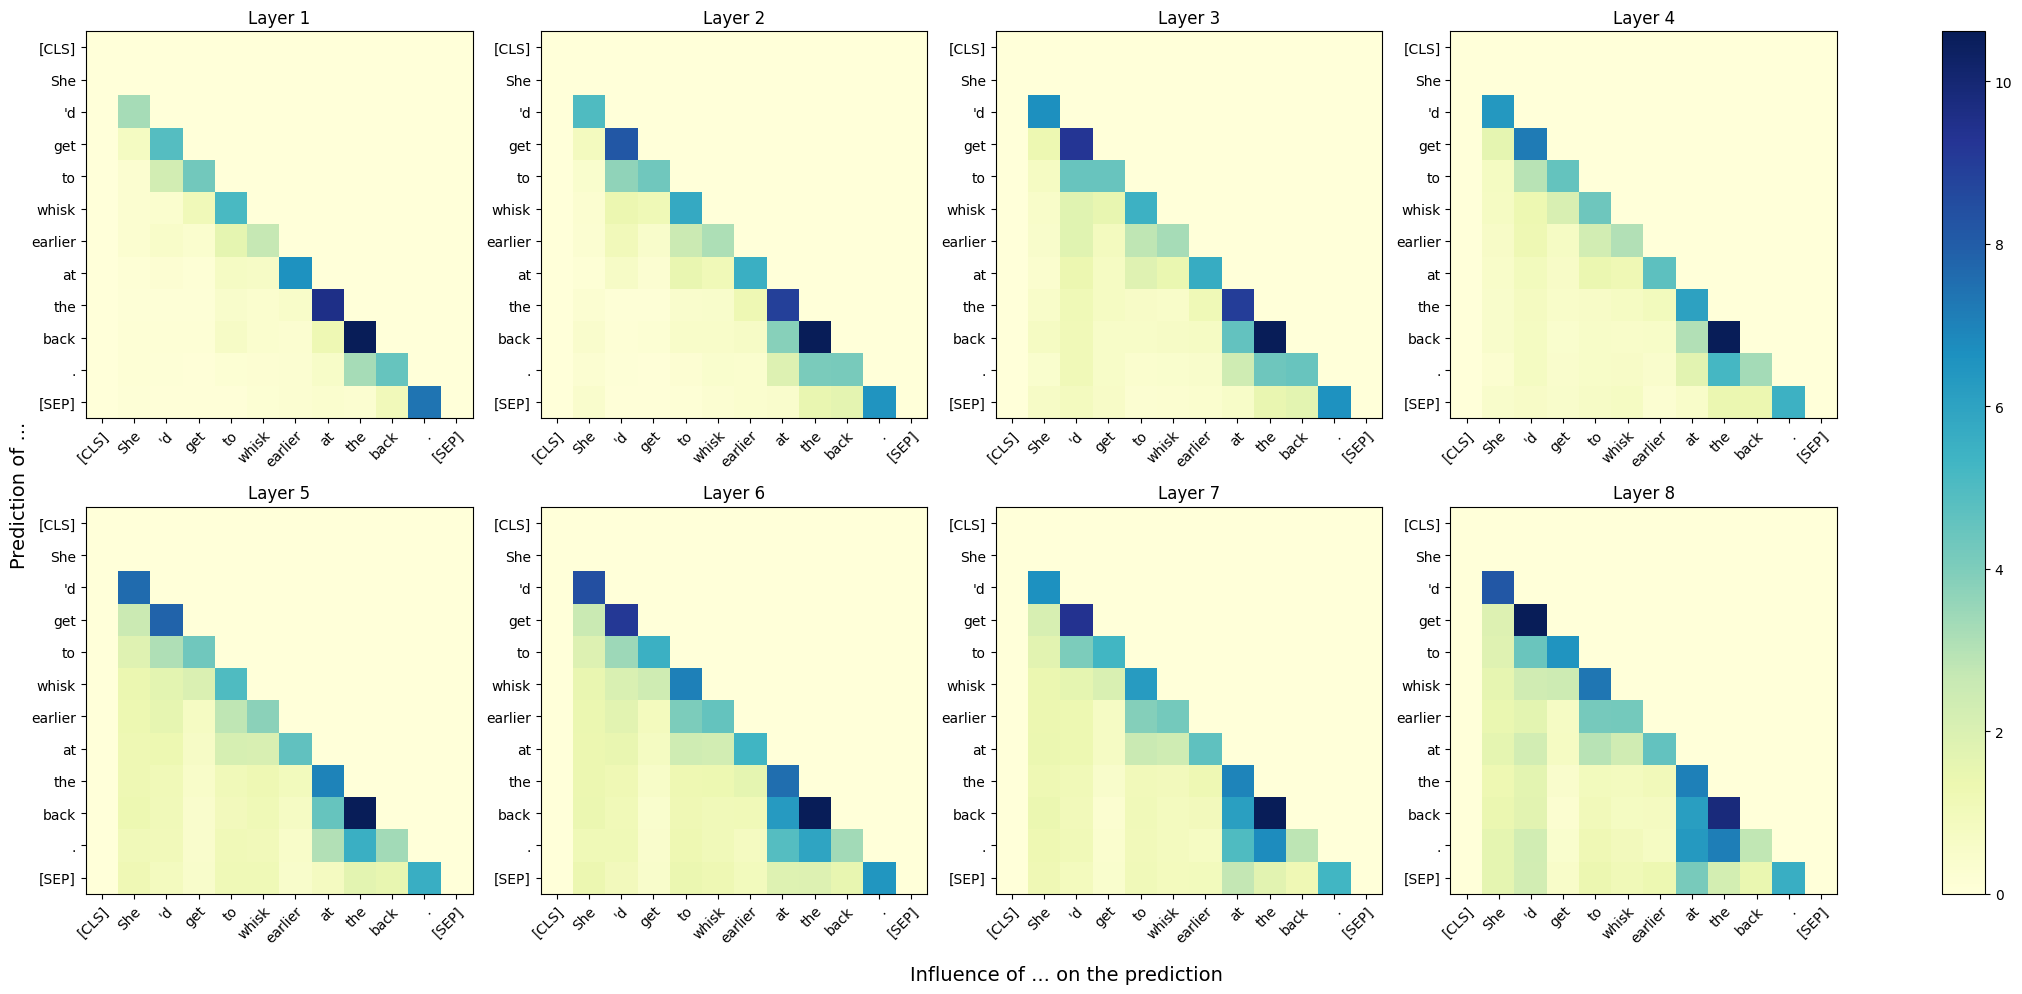

In [ ]:
sentence[2] = "'d"
visualize_all_layer_matrices(sentence, all_matrices)

## Spearman correlation

Spearman correlation are for the similarities between predicted trees and gold trees

In [5]:
def open_spearmann_resultfile(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    
    return data

### Without punctuation

In [162]:
spearman_data = {'deberta' : None, 'gpt2' : None}
for model in ['gpt2', 'deberta']:
    filename = f'results/spearman_dist_{model}_without_punct.pkl'
    spearman_data[model] = open_spearmann_resultfile(filename)
spearman_data

{'deberta': {'deberta': [(0.47266254076315356, 0.1634713308003209),
   (0.4971603194795072, 0.15411890349758206),
   (0.5074292139524706, 0.14309572783985242),
   (0.4995044357131044, 0.14672281632469011),
   (0.494138674837841, 0.14972078010697593),
   (0.4916793619274196, 0.15162965715437193),
   (0.496852071390417, 0.1489383268075613),
   (0.4996809357291788, 0.14808100939249316),
   (0.49779136218243875, 0.14910220569105406)],
  'gpt2': [(0.47266254076315356, 0.1634713308003209),
   (0.5008463323178525, 0.1468231883350638),
   (0.500759577736112, 0.1467774460471787),
   (0.5005243783845815, 0.14689706257203128),
   (0.5006392716960119, 0.14686785161236957),
   (0.5019775961879158, 0.14617550709466418),
   (0.5033503376666629, 0.1451873670540362),
   (0.50258547753921, 0.14523623582243606),
   (0.5091398925468793, 0.1411995160099522)]},
 'gpt2': {'deberta': [(0.47266254076315356, 0.1634713308003209),
   (0.4971603194795072, 0.15411890349758206),
   (0.5074292139524706, 0.14309572783

In [141]:
def plot_spearman_results(spearman_data):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.plot(range(len(spearman_data['gpt2'])), list(zip(*spearman_data['gpt2']))[0], label='gpt2')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Spearman correlation (-1 < r < 1)')
    ax.set_title('Spearman correlation')
    ax.legend()
    plt.show()

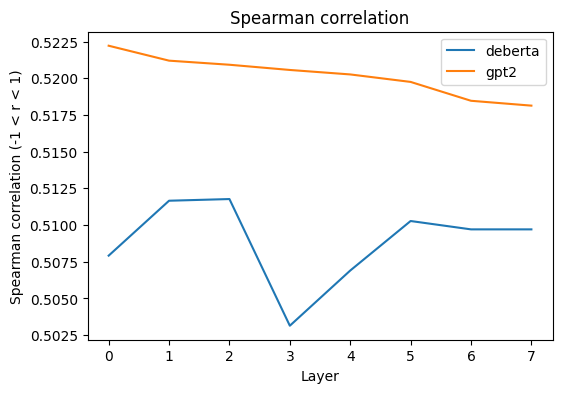

In [142]:
plot_spearman_results(spearman_data)

### With punctuation

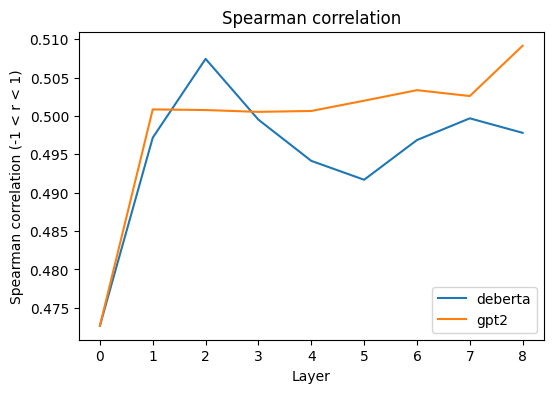

In [164]:
filename = f'results/spearman_dist_all.pkl'
spearman_data = open_spearmann_resultfile(filename)
plot_spearman_results(spearman_data)

## Classic evaluation

### Without punctuation

In [165]:
def open_pkl_result(path):
    with open(path, 'rb') as f:
        # data is list with tuples per sentene: (precision, recall, f1)
        data = pickle.load(f)
    
    return data

In [155]:
def plot_pr_rc_f1(data, model):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(range(len(data)), list(zip(*data))[0], label='precision')
    ax.plot(range(len(data)), list(zip(*data))[1], label='recall')
    ax.plot(range(len(data)), list(zip(*data))[2], label='f1')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Score')
    ax.set_title(f'Precision, recall and f1 for {model}')
    ax.legend()
    plt.show()

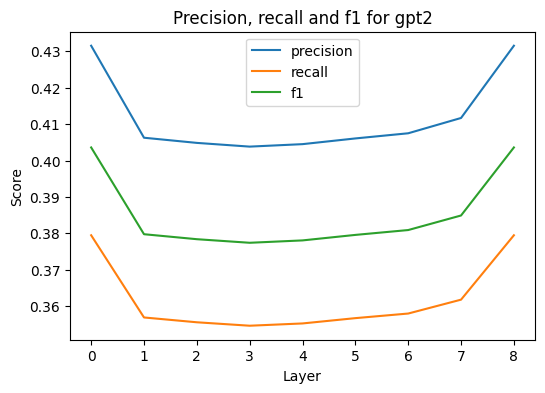

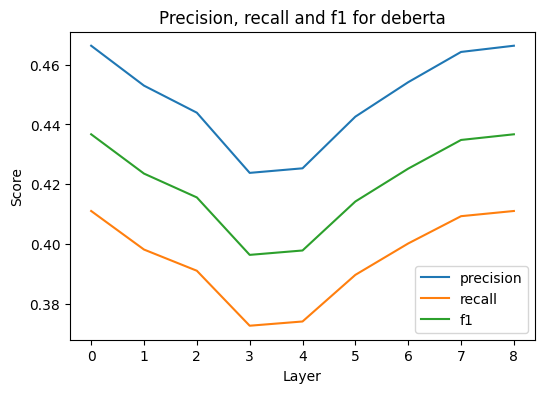

In [156]:
gpt2_classic = open_pkl_result(f'results/classic_dist_gpt2_all_layers_without_punct.pkl')
deberta_classic = open_pkl_result(f'results/classic_dist_deberta_all_layers_without_punct.pkl')

plot_pr_rc_f1(gpt2_classic, 'gpt2')
plot_pr_rc_f1(deberta_classic, 'deberta')

In [157]:
def plot_classic_both(data1, data2, model1, model2):
    fig, ax = plt.subplots(figsize=(6, 4))
    colors = ['tab:orange', 'tab:blue', 'tab:green']
    for i, (data, model) in enumerate(zip([data1, data2], [model1, model2])):
        if i == 0:
            style = '-'
        else:
            style = '--'
        ax.plot(range(len(data)), list(zip(*data))[0], label=f'{model} precision', color=colors[0], linestyle=style)
        ax.plot(range(len(data)), list(zip(*data))[1], label=f'{model} recall', color=colors[1], linestyle=style)
        ax.plot(range(len(data)), list(zip(*data))[2], label=f'{model} f1', color=colors[2], linestyle=style)

    # ax.plot(range(len(data1)), list(zip(*data1))[0], label=f'{model1} precision')
    # ax.plot(range(len(data2)), list(zip(*data2))[0], label=f'{model2} precision')

    # ax.plot(range(len(data1)), list(zip(*data1))[1], label=f'{model1} recall')
    # ax.plot(range(len(data2)), list(zip(*data2))[1], label=f'{model2} recall')
    
    # ax.plot(range(len(data1)), list(zip(*data1))[2], label=f'{model1} f1')
    # ax.plot(range(len(data2)), list(zip(*data2))[2], label=f'{model2} f1')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Score')
    ax.set_title(f'Precision, Recall and F1 for {model1} and {model2}')
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


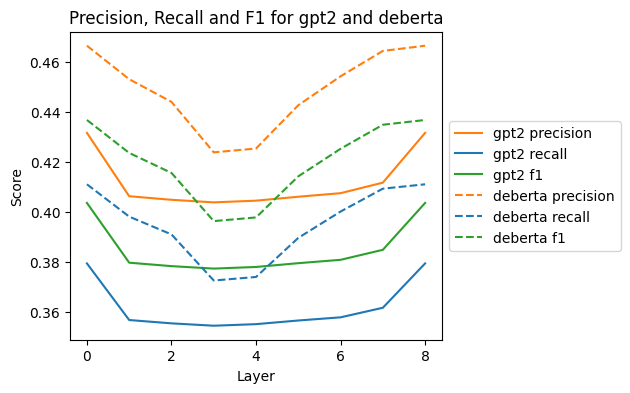

In [158]:
plot_classic_both(gpt2_classic, deberta_classic, 'gpt2', 'deberta')

### With punctuation

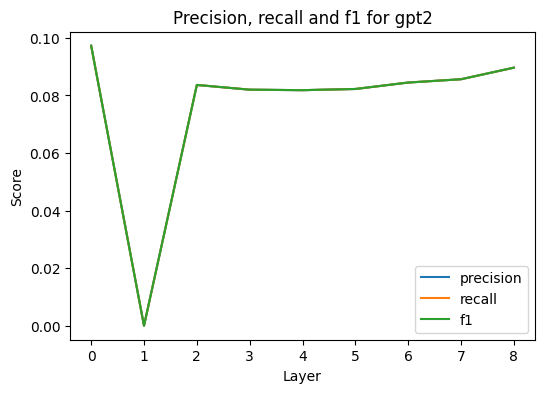

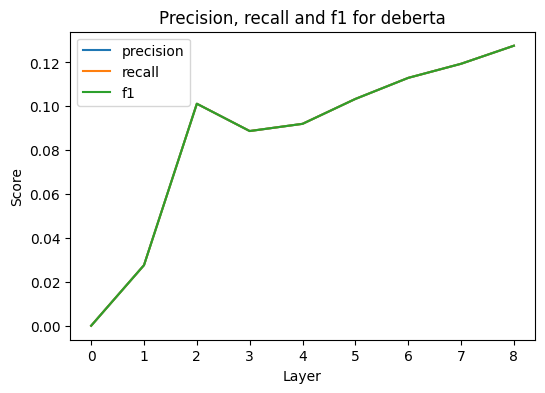

In [166]:
gpt2_classic = open_pkl_result(f'results/classic_dist_gpt2_all_layers.pkl')
deberta_classic = open_pkl_result(f'results/classic_dist_deberta_all_layers.pkl')

plot_pr_rc_f1(gpt2_classic, 'gpt2')
plot_pr_rc_f1(deberta_classic, 'deberta')

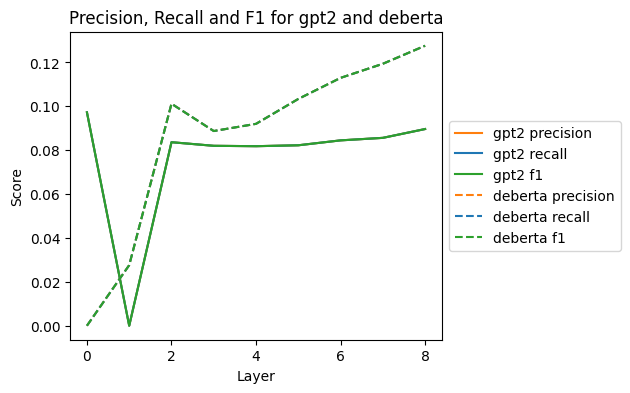

In [167]:
plot_classic_both(gpt2_classic, deberta_classic, 'gpt2', 'deberta')

## Quantitative analysis MLM and CLM

In [ ]:
def open_pkl_result(model, layer):
    with open(f'results/i_matrices/{model}_dist_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [ ]:
def get_all_results():
    mlm_clm_results = {'gpt2' : {}, 'deberta' : {}}

    for model in ['gpt2', 'deberta']:
        for layer in range(1, 9):
            data = open_pkl_result(model, layer)
            mlm_clm_results[model][layer] = data
    
    return mlm_clm_results

In [ ]:
def get_diff_only_lower(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # set values upper triangle to 0
            below_mlm = np.tril(mlm_layers[s][2], k=-1)
            diff_per_layer[i].append(np.mean(np.abs(clm_layers[s][2] - below_mlm)))
    return diff_per_layer

In [ ]:
def get_diff_mean_mlm(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # mean of upper & lower triangle
            mean_triangles = (np.triu(mlm_layers[s][2], k=1).T + np.tril(mlm_layers[s][2], k=-1)) / 2
            diff_per_layer[i].append(np.mean(np.abs(clm_layers[s][2] - mean_triangles)))
            
    return diff_per_layer

In [ ]:
def plot_diff_per_layer(diff_per_layer):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(range(len(diff_per_layer)), [np.mean(diff_per_layer[i]) for i in range(len(diff_per_layer))])
    ax.set_xlabel('Layer')
    ax.set_ylabel('Mean difference')
    ax.set_title('Mean difference between MLM and CLM')
    plt.show()

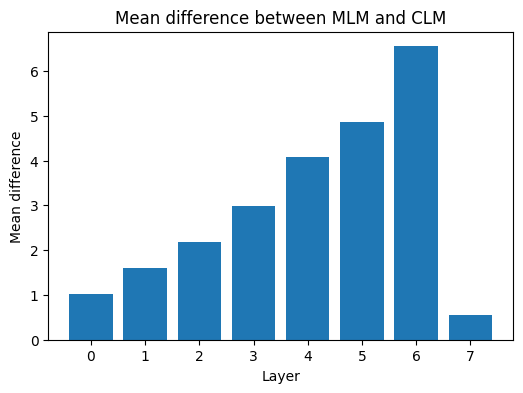

In [ ]:
results = get_all_results()
diff = get_diff_mean_mlm(results)
plot_diff_per_layer(diff)

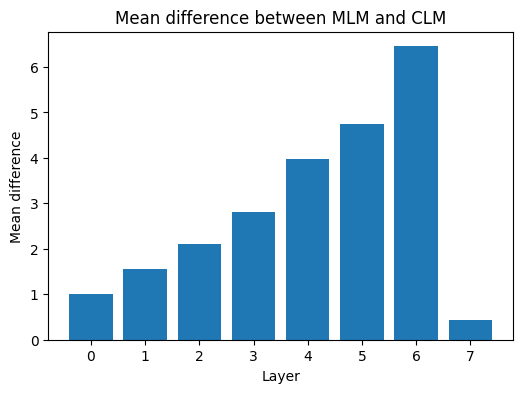

In [ ]:
diff_lower = get_diff_only_lower(results)
plot_diff_per_layer(diff_lower)

In [124]:
def get_diff_matrix_lowertr(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # set values upper triangle to 0
            below_mlm = np.tril(mlm_layers[s][2], k=-1)
            diff_per_layer[i].append(np.abs(clm_layers[s][2] - below_mlm))
    return diff_per_layer

In [133]:
def visualize_diff_matrices(matrices, sent_idx):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx][sent_idx]
        
        # Create heatmap
        print(imatrix.shape)
        im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)

(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


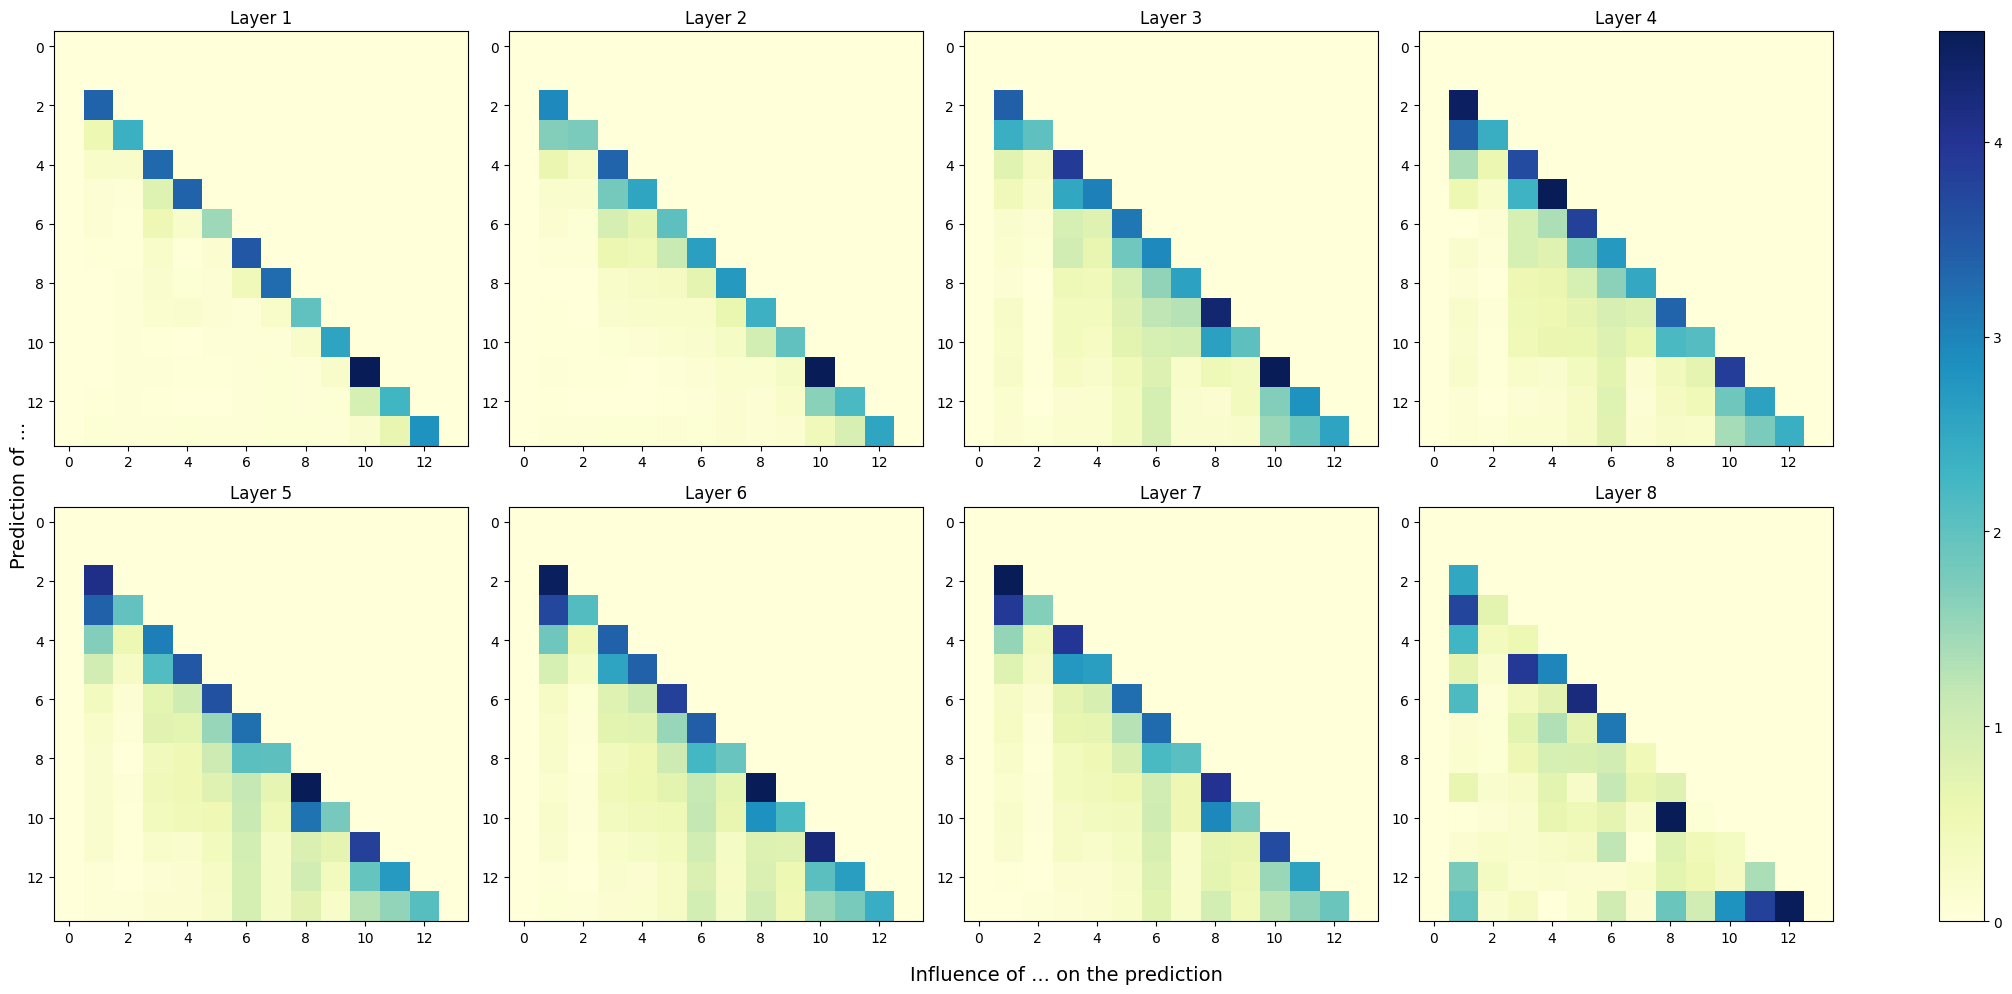

In [134]:
# only for one sentence
data_diff = get_diff_matrix_lowertr(results)
visualize_diff_matrices(data_diff, sent_idx=5)

## Spearman retrained grammars

In [8]:
def plot_spearman_results_topks(spearman_data):
    fig, ax = plt.subplots(figsize=(6, 4))
    for topk in spearman_data.keys():
        ax.plot(range(len(spearman_data[topk])), list(zip(*spearman_data[topk]))[0], label=topk)
    #ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Spearman correlation (-1 < r < 1)')
    ax.set_title('Spearman correlation')
    ax.legend()
    plt.show()

In [7]:
spearman_data = {}
for topk in [0.2, 0.3, 0.4, 0.5]:
    filename = f'test_results/eval/deberta/normal/{topk}/spearman_dist_deberta_without_punct.pkl'
    spearman_data[topk] = open_spearmann_resultfile(filename)
spearman_data

{0.2: [(0.492009246835954, 0.16424202641017996),
  (0.339571194176903, 0.2566096643112706),
  (0.3355958397715438, 0.2592724762811447),
  (0.34964423905515113, 0.24065946301210564),
  (0.37316685825533774, 0.23181811914263292),
  (0.45734253956912835, 0.1826894874950152),
  (0.48953790987433704, 0.16570047245592637)],
 0.3: [(0.557355966984722, 0.11196596715525839),
  (0.309015715834307, 0.25987793811625004),
  (0.3430256019330634, 0.2348033291274472),
  (0.540183131035491, 0.11918503158049247),
  (0.5472566571754813, 0.11279222224461617),
  (0.554356261864855, 0.11177076521143103),
  (0.558070534905959, 0.11030163744660676)],
 0.4: [(0.5367247248800364, 0.12831211047830482),
  (0.2978201002783576, 0.26263470904033764),
  (0.35099557959937727, 0.237406140299756),
  (0.38196297838787896, 0.2198514957929084),
  (0.4554164729290242, 0.17561695624720491),
  (0.5150285582022911, 0.138958512847266),
  (0.5399937237028533, 0.1264585858051163)],
 0.5: [(0.49347215482581025, 0.15255666324587142

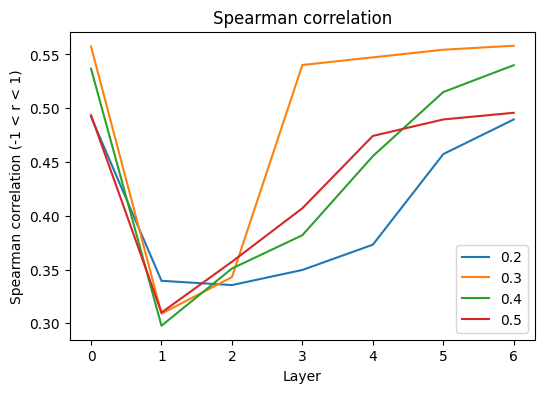

In [9]:
plot_spearman_results_topks(spearman_data)

## Plot classic

In [ ]:
def plot_classic_results_topks(spearman_data):
    fig, ax = plt.subplots(figsize=(6, 4))
    for topk in spearman_data.keys():
        ax.plot(range(len(spearman_data[topk])), list(zip(*spearman_data[topk]))[0], label=topk)
    #ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Spearman correlation (-1 < r < 1)')
    ax.set_title('Spearman correlation')
    ax.legend()
    plt.show()

In [ ]:
spearman_data = {}
for topk in [0.2, 0.3, 0.4, 0.5]:
    filename = f'test_results/eval/deberta/normal/{topk}/spearman_dist_deberta_without_punct.pkl'
    spearman_data[topk] = open_spearmann_resultfile(filename)
spearman_data

In [3]:
import pickle

In [2]:
topk = 0.2
precisions = {}
recalls = {}
f1s = {}
for topk in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    with open(f'/Users/sperdijk/Documents/Master/Jaar_3/Thesis/thesis_code/perturbed-masking/test_results/eval/deberta/normal/{topk}/classic_dist_deberta_without_punct.pkl', 'rb') as f:
        data = pickle.load(f)
        precisions[topk] = list(zip(*data))[0]
        recalls[topk] = list(zip(*data))[1]
        f1s[topk] = list(zip(*data))[2]
f1s

{0.2: (array([0.24151698]),
  array([0.30512717]),
  array([0.30043154]),
  array([0.26855993]),
  array([0.29893912]),
  array([0.28894781]),
  array([0.29080417]),
  array([0.24498831]),
  array([0.24319228])),
 0.3: (array([0.28797108]),
  array([0.23861946]),
  array([0.30305284]),
  array([0.29966786]),
  array([0.28868023]),
  array([0.29850729]),
  array([0.30177558]),
  array([0.3091114]),
  array([0.29972604])),
 0.4: (array([0.31102293]),
  array([0.27056295]),
  array([0.31905319]),
  array([0.29521421]),
  array([0.31933025]),
  array([0.31321616]),
  array([0.31173144]),
  array([0.30693345]),
  array([0.30852011])),
 0.5: (array([0.3213179]),
  array([0.30439714]),
  array([0.27164041]),
  array([0.31587054]),
  array([0.32419074]),
  array([0.33185191]),
  array([0.32226182]),
  array([0.32079893]),
  array([0.32269047])),
 0.6: (array([0.39321141]),
  array([0.35546409]),
  array([0.39392147]),
  array([0.39507872]),
  array([0.39277104]),
  array([0.41518077]),
  array

In [5]:
def plot_classic_results_topks(data, name):
    fig, ax = plt.subplots(figsize=(6, 4))

    for topk in data.keys():
        ax.plot(range(len(data[topk])), list(zip(*data[topk]))[0], label=topk)
    #ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.set_xlabel('Layer')
    ax.set_ylabel(f'{name}')
    ax.set_title(f'{name}')
    ax.legend()
    plt.show()

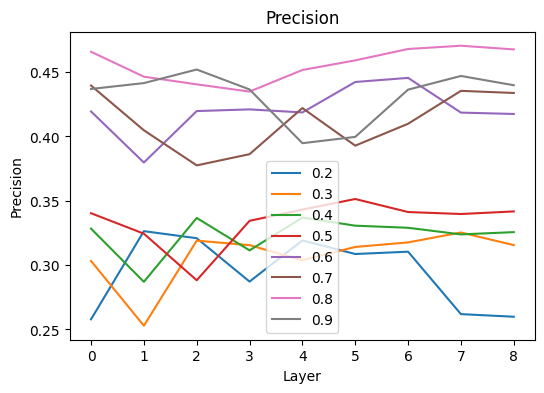

In [6]:
plot_classic_results_topks(precisions, "Precision")

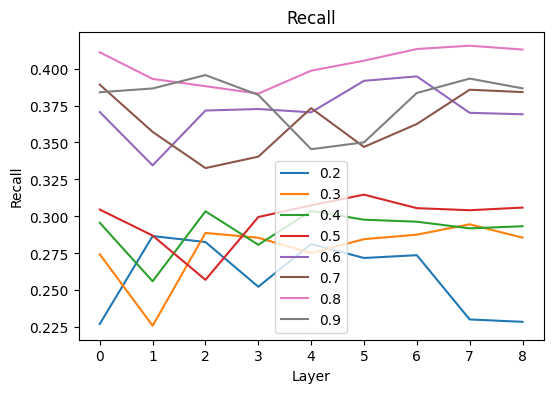

In [7]:
plot_classic_results_topks(recalls, "Recall")

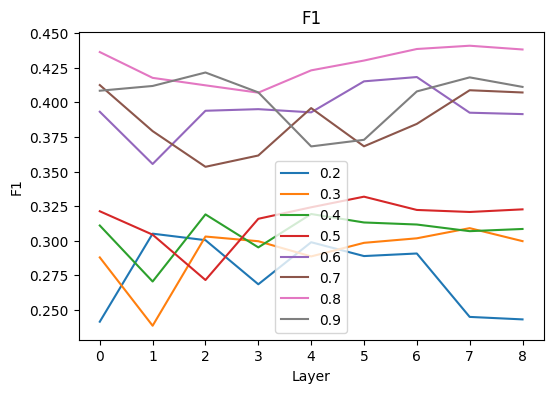

In [8]:
plot_classic_results_topks(f1s, "F1")

## Impact matrices retrained grammars

In [12]:
with open(f'/Users/sperdijk/Documents/Master/Jaar_3/Thesis/thesis_code/perturbed-masking/test_results/i_matrices/deberta/normal/0.2/deberta_dist_0.pkl', 'rb') as f:
    data = pickle.load(f)
data

[(['``',
   'I',
   '<apostrophe>ll',
   'be',
   'left',
   ',',
   '<apostrophe><apostrophe>',
   'he',
   'said',
   '.'],
  ['[CLS]',
   '``',
   'I',
   '<apostrophe>ll',
   'be',
   'left',
   ',',
   '<apostrophe><apostrophe>',
   'he',
   'said',
   '.',
   '[SEP]'],
  array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
  [[[[[['``', 

In [99]:
sentences = defaultdict(list)
imatrices = defaultdict(list)
for topk in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    matrices = []
    for i in range(9):
        with open(f'/Users/sperdijk/Documents/Master/Jaar_3/Thesis/thesis_code/perturbed-masking/test_results/i_matrices/deberta/normal/{topk}/deberta_dist_{i}.pkl', 'rb') as f:
            data = list(zip(*pickle.load(f)))

        if i == 0:
            sentences[topk].append(data[1])
        matrices.append(data[2])
    imatrices[topk].append(matrices)

In [33]:
print(sentences[0.2])

[(['[CLS]', '``', 'I', '<apostrophe>ll', 'be', 'left', ',', '<apostrophe><apostrophe>', 'he', 'said', '.', '[SEP]'], ['[CLS]', '``', 'I', '<apostrophe>ll', 'have', 'seen', ',', '<apostrophe><apostrophe>', 'he', 'said', '.', '[SEP]'], ['[CLS]', 'I', 'grabbed', 'his', 'head', 'and', 'put', 'his', 'head', 'on', 'the', 'road', '.', '[SEP]'], ['[CLS]', '``', 'I', '<apostrophe>ll', 'have', 'left', ',', '<apostrophe><apostrophe>', 'he', 'said', '.', '[SEP]'], ['[CLS]', 'I', 'raised', 'his', 'hand', 'and', 'felt', 'a', 'small', 'thing', 'into', 'the', 'room', '.', '[SEP]'], ['[CLS]', 'I', 'looked', 'into', 'the', 'table', ',', 'putting', 'his', 'hand', 'into', 'the', 'air', '.', '[SEP]'], ['[CLS]', '``', 'I', 'do', 'n<apostrophe>t', 'worry', ',', '<apostrophe><apostrophe>', 'he', 'said', '.', '[SEP]'], ['[CLS]', 'I', 'raised', 'his', 'head', 'and', 'closed', 'his', 'face', '.', '[SEP]'], ['[CLS]', 'I', 'opened', 'his', 'face', 'and', 'smiled', '.', '[SEP]'], ['[CLS]', 'I', 'put', 'his', 'hand'

In [113]:
topk = 0.2
which = 5
test_sentence = sentences[topk][0][which]
print(test_sentence)
# for i, word in enumerate(test_sentence):
#     if '<apostrophe>' in word:
#         # replace each occurences of <apostrophe> with "'"
#         test_sentence[i] = "'"

test_all_layers = []
for i in range(1, 9):
    test_all_layers.append(imatrices[topk][0][i][which])

len(test_all_layers)

['[CLS]', 'I', 'looked', 'into', 'the', 'table', ',', 'putting', 'his', 'hand', 'into', 'the', 'air', '.', '[SEP]']


8

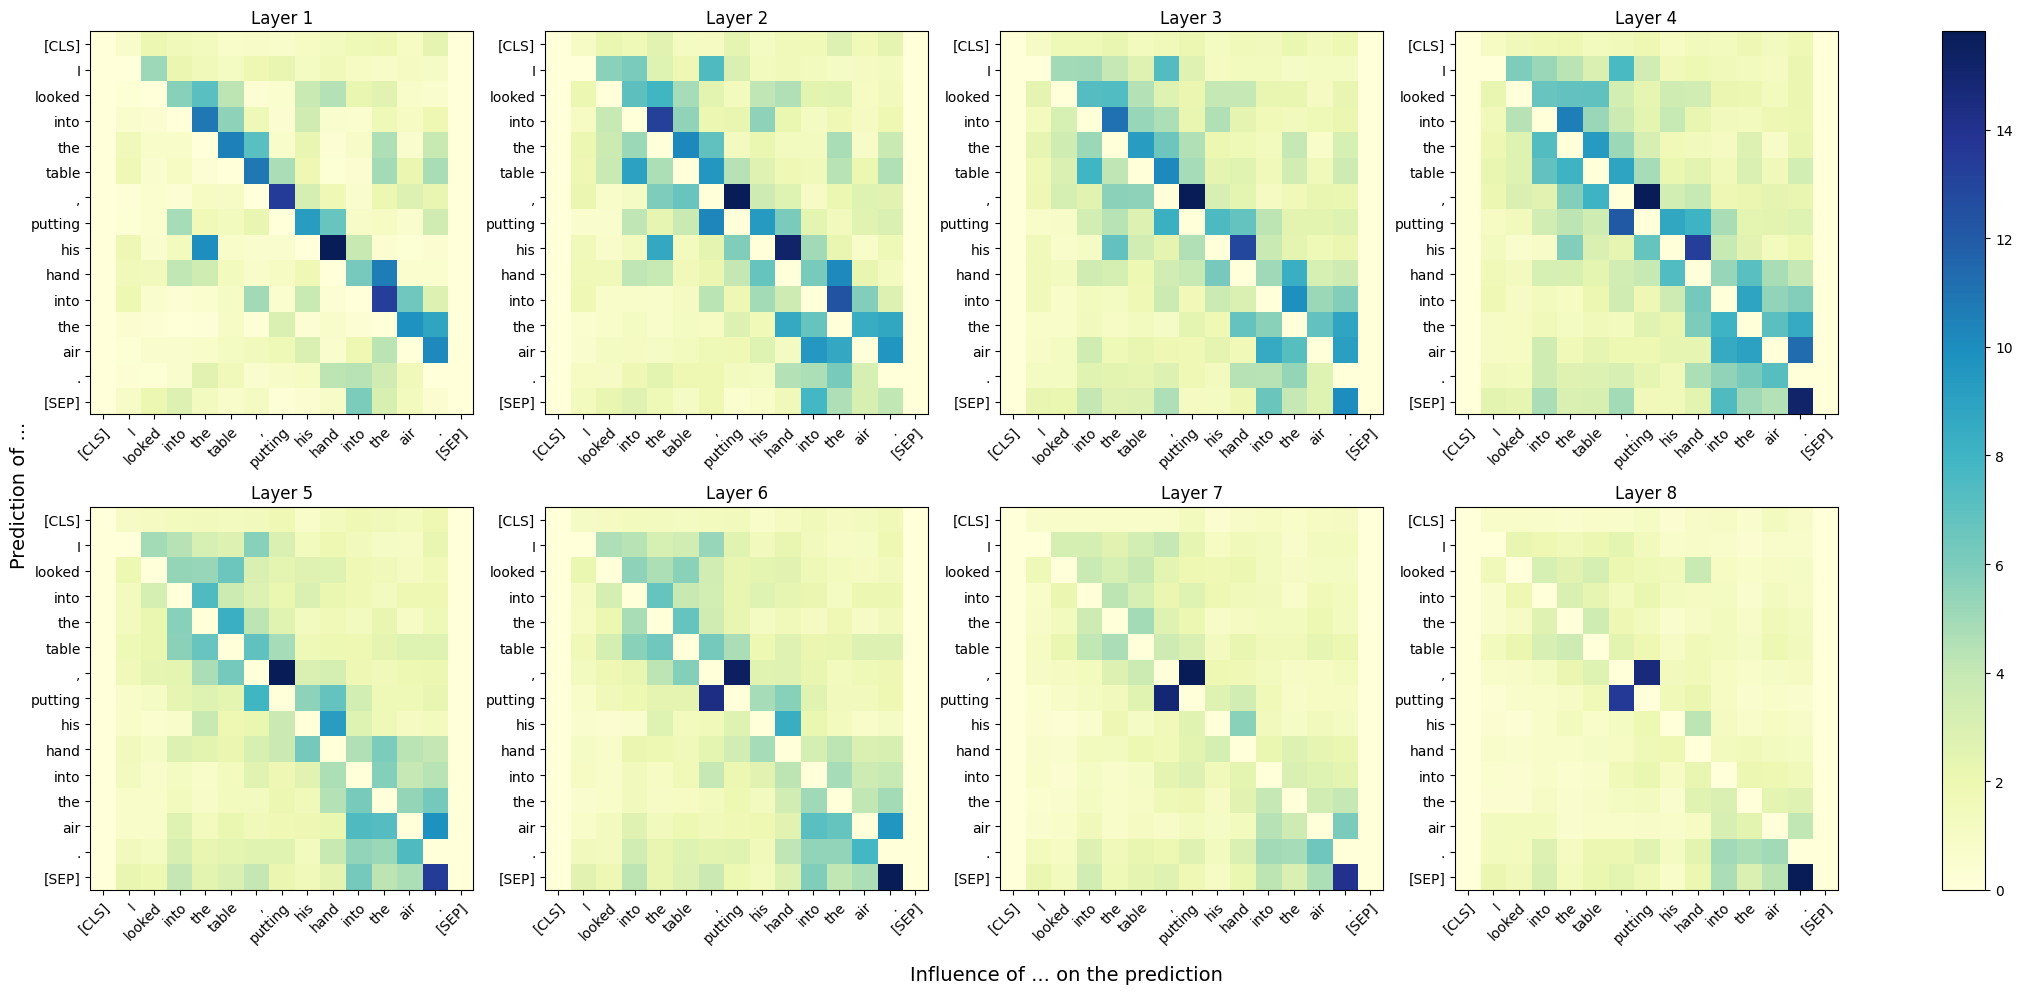

In [114]:
visualize_all_layer_matrices(test_sentence, test_all_layers)